In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('data-kmeans.csv')
data = dataset.values
x, y = data[:,0],data[:,1]
dataset

,x,y
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


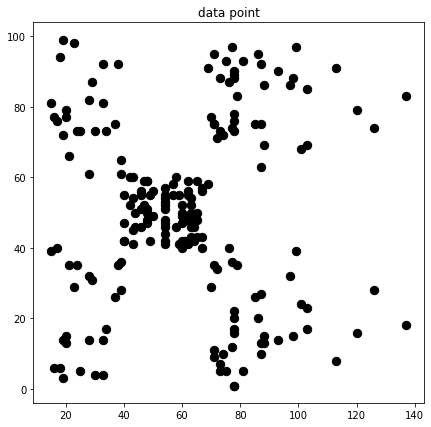

In [132]:
plt.figure(figsize=(7,7))
plt.title('data point')
plt.scatter(x,y, c='black', s=70)

In [33]:
def compute_distance(a, b):

    dist = (np.sum(np.power(a - b,2))) ** 0.5

    return dist


In [34]:
def compute_centroid(Z):

    center = np.mean(Z, axis=0)
    
    return center


In [35]:
def compute_label(z, M):
    dists = []
    for m in M :
        dists.append(compute_distance(z,m))
    label = np.argmin(dists)
    
    return label


In [115]:
# init clusters
cluster_num = 5
centroids = [None for _ in range(cluster_num)]
clusters = [[] for _ in range(cluster_num)]
for point in data :
    rand_num = np.random.randint(cluster_num)
    clusters[rand_num].append(point)
for idx, cluster in enumerate(clusters) :
    clusters[idx] = np.array(cluster)
    centroids[idx] = compute_centroid(cluster)
centroids = np.array(centroids)

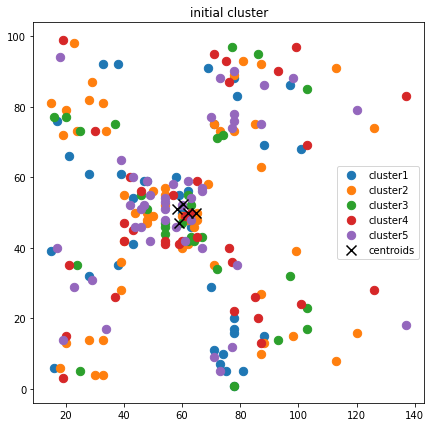

In [133]:
plt.figure(figsize=(7,7))
plt.title('initial cluster')
legends = ['cluster{}'.format(idx+1) for idx in range(cluster_num)]
legends.append('centroids')
for idx in range(cluster_num) :
    plt.scatter(clusters[idx][:,0],clusters[idx][:,1], s=70)
plt.scatter(centroids[:,0], centroids[:,1], marker='x', c='black', s=100)
plt.legend(legends)

In [85]:
'cluster{}'.format(1)

'cluster1'

In [ ]:
def compute_loss(C, M):

    loss = #compute loss#
    
    return loss
